Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release, and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [1]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]
# Restart runtime
exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

## From source

Before being staged for a stable release, we constantly iterate on the community feedback to improve the library. Bug fixes and performance improvements are regularly pushed to the project Git repository. Using this installation method, you will access all the latest features that have not yet made their way to a pypi release!

In [ ]:
# Colab related installations to install pyproject.toml projects correctly
!sudo apt install libcairo2-dev pkg-config
!pip3 install pycairo
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install python-doctr[tf]@git+https://github.com/mindee/doctr.git
# PyTorch
!pip3 install python-doctr[torch]@git+https://github.com/mindee/doctr.git
# Restart runtime
exit()

Now go to  `Runtime/Restart runtime` for your changes to take effect!

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [1]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,388 kB of archives.
After this operation, 6,653 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-freefont-ttf all 20120503-10build1 [2,388 kB]
Fetched 2,388 kB in 2s (1,211 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading databa

Let's take care of all the imports directly

In [19]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [61]:
# Download a sample
#!wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
#doc = DocumentFile.from_pdf("Cash-Payment-Receipt-Template.pdf")

#doc = DocumentFile.from_pdf("teszt_img.pdf")
doc = DocumentFile.from_pdf("teszt_img2.pdf")

print(f"Number of pages: {len(doc)}")

Number of pages: 1


docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

In [62]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [ ]:
# Display the architecture
print(predictor)

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [64]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

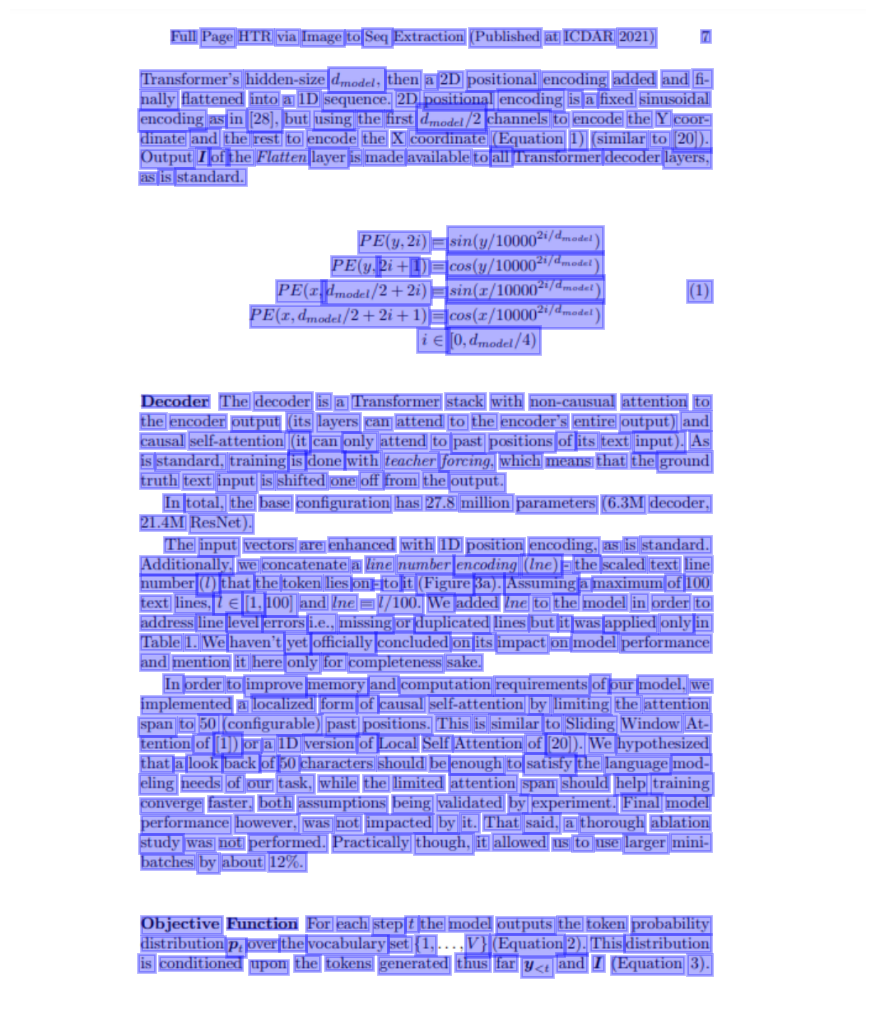

In [65]:
#result.show(doc)
res = result
res.show()

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

In [66]:
res.render()

"Full Page HTR via Image to Seq Extraction (Published at ICDAR 2021)\nTransformer's hidden-size dmodel, then a 2D positional encoding added and fi-\nnally fattened into a 1D sequence. 2D positional encoding is a fixed sinusoidal\nencoding as in [28), but using the first dmoda/2 channels to encode the Y coor-\ndinate and the rest to encode the X coordinate (Equation 1) (similar to [20]).\nOutput I of the Flatten layer is made available to all Transformer decoder layers,\n\n7\n\nas is standard.\n\nPE(,2i) = ain(g/10000/4---)\nPE(y, 2i+1 1) = cos(4/10000-/4--)\nPE(z, dmodei/2+2:) = ain(/10000-/4--)\nPE6,4./2+2+) = cos(a/1000-14--)\n\n(1)\n\nie [0,dmodei/4)\n\nDecoder The decoder is a Transformer stack with non-causual attention to\nthe encoder output (its layers can attend to the encoder's entire output) and\ncausal self-attention (it can only attend to past positions of its text input). As\nis standard, training is done with teacher forcing, which means that the ground\nIn total, the bas

In [67]:
faulty_lines = []
faulty_blocks = []
for page in res.pages:
  for block in page.blocks:
    for line in block.lines:
      for word in line.words:
        if word.confidence <= 0.50:
          if line not in faulty_lines:
            faulty_lines.append(line)
          if block not in faulty_blocks:
            faulty_blocks.append(block)
          break

#print(result.pages[0].blocks[0])
print(f"num of faulty_blocks: {len(faulty_blocks)}")
print(f"num of faulty_lines: {len(faulty_lines)}")

num of faulty_blocks: 3
num of faulty_lines: 7


In [68]:
probably_math_line = []
indexes = []

for line in faulty_lines:
  conf = 0
  if len(line.words) >= 1:
    for word in line.words:
      conf += word.confidence
    if conf/len(line.words) <= 0.8:
      probably_math_line.append(line)
      indexes.append(faulty_lines.index(line))

print(f"num of faulty lines: {len(faulty_lines)}")
print(f"num of probably math lines: {len(probably_math_line)}")

num of faulty lines: 7
num of probably math lines: 3


In [69]:
probably_math_blocks = []

for block in faulty_blocks:
  for line in probably_math_line:
    if line in block.lines:
      probably_math_blocks.append(block)
      break
print(f"num of probably_math_blocks: {len(probably_math_line)}")

num of probably_math_blocks: 3


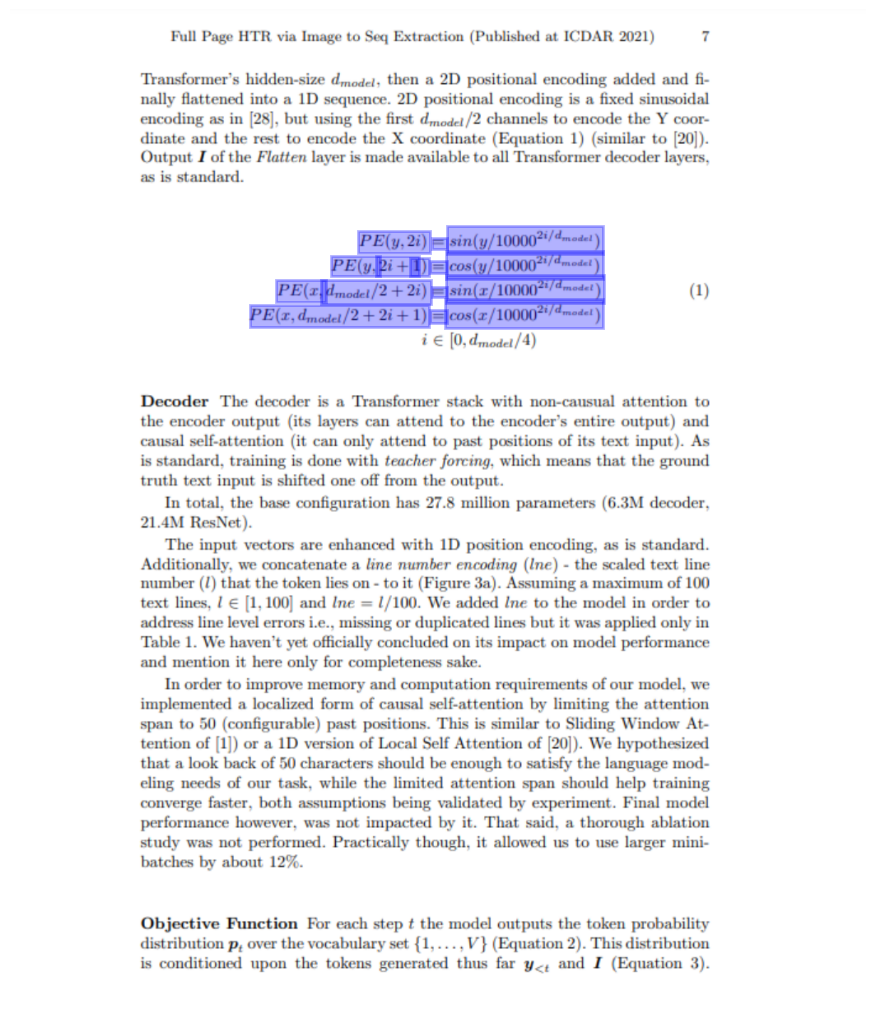

In [70]:
res.pages[0].blocks = probably_math_blocks
res.show()

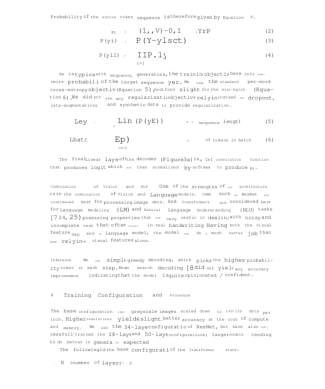

In [ ]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [ ]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (766, 634), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.1330558704652997, 0.013671875), (0.8032303578470031, 0.03515625)), 'lines': [{'geometry': ((0.1330558704652997, 0.013671875), (0.8032303578470031, 0.03515625)), 'words': [{'value': 'Probability', 'confidence': 0.9372847080230713, 'geometry': ((0.1330558704652997, 0.0146484375), (0.23688572062302837, 0.033203125))}, {'value': 'of', 'confidence': 0.9999985694885254, 'geometry': ((0.23924548994479494, 0.013671875), (0.2628431831624606, 0.03125))}, {'value': 'the', 'confidence': 0.9995619654655457, 'geometry': ((0.26402306782334384, 0.0146484375), (0.2970598383280757, 0.0302734375))}, {'value': 'entire', 'confidence': 0.9976671934127808, 'geometry': ((0.3005994923107256, 0.015625), (0.35487418671135645, 0.0302734375))}, {'value': 'token', 'confidence': 0.9994606375694275, 'geometry': ((0.3595937253548896, 0.014

In [ ]:
# XML export
xml_output = result.export_as_xml()
print(xml_output[0][0])

b'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><title>docTR - XML export (hOCR)</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="ocr-system" content="python-doctr v0.8.0" /><meta name="ocr-capabilities" content="ocr_page ocr_carea ocr_par ocr_line ocrx_word" /></head><body><div class="ocr_page" id="page_1" title="image; bbox 0 0 634 766; ppageno 0" /><div class="ocr_carea" id="block_1" title="bbox 84 10                     509 27"><p class="ocr_par" id="par_1" title="bbox 84 10                     509 27"><span class="ocr_line" id="line_1" title="bbox 84 10                         509 27;                         baseline 0 0; x_size 0; x_descenders 0; x_ascenders 0"><span class="ocrx_word" id="word_1" title="bbox 84 11                             150 25;                             x_wconf 94">Probability</span><span class="ocrx_word" id="word_2" title="bbox 152 10                             167 24;                             x